##### Setting Working Directory and Importing Libraries

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
os.chdir("/Users/rohanchhabra/Desktop/Airline")
os.getcwd()

#### Loading Data for years 1998 to 2007

In [60]:
#Loading processed flight data for each year (1998-2007)
flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv") for year in range(1998, 2008)])

#Selecting relevant columns from flight data
flight_data = flight_data[['Year', 'DayOfWeek', 'ArrDelay', 'DepDelay','ArrTime', 'DepTime' ]]

/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_40312/2039793593.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv") for year in range(1998, 2008)])
/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_40312/2039793593.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv") for year in range(1998, 2008)])
/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_40312/2039793593.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv") for year in range(1998, 2008)])
/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_40312/2039793593.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or se

### Best Day of the week to minimise delay done separately for Arrival Delay and Departure Delay

#### Grouping & Renaming Columns (Arrival Delay)

In [61]:
# Grouping flight_data by Year and DayOfWeek, calculating average arrival delay
day_of_week_avg_delays = flight_data.groupby(['Year', 'DayOfWeek']).agg({'ArrDelay': 'mean'}).reset_index()

In [62]:
# Renaming 'ArrDelay' column to 'AvgArrDelay'
day_of_week_avg_delays.rename(columns={'ArrDelay': 'AvgArrDelay'}, inplace=True)

In [63]:
#Creating dictionary to map day of week numbers to names(1= Monday,.....,7=Sunday)
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

In [64]:
#Mapping day of week numbers to names
day_of_week_avg_delays['DayOfWeek'] = day_of_week_avg_delays['DayOfWeek'].map(day_map)

#### Plotting for Arrival Delay 

<Figure size 1500x1000 with 0 Axes>

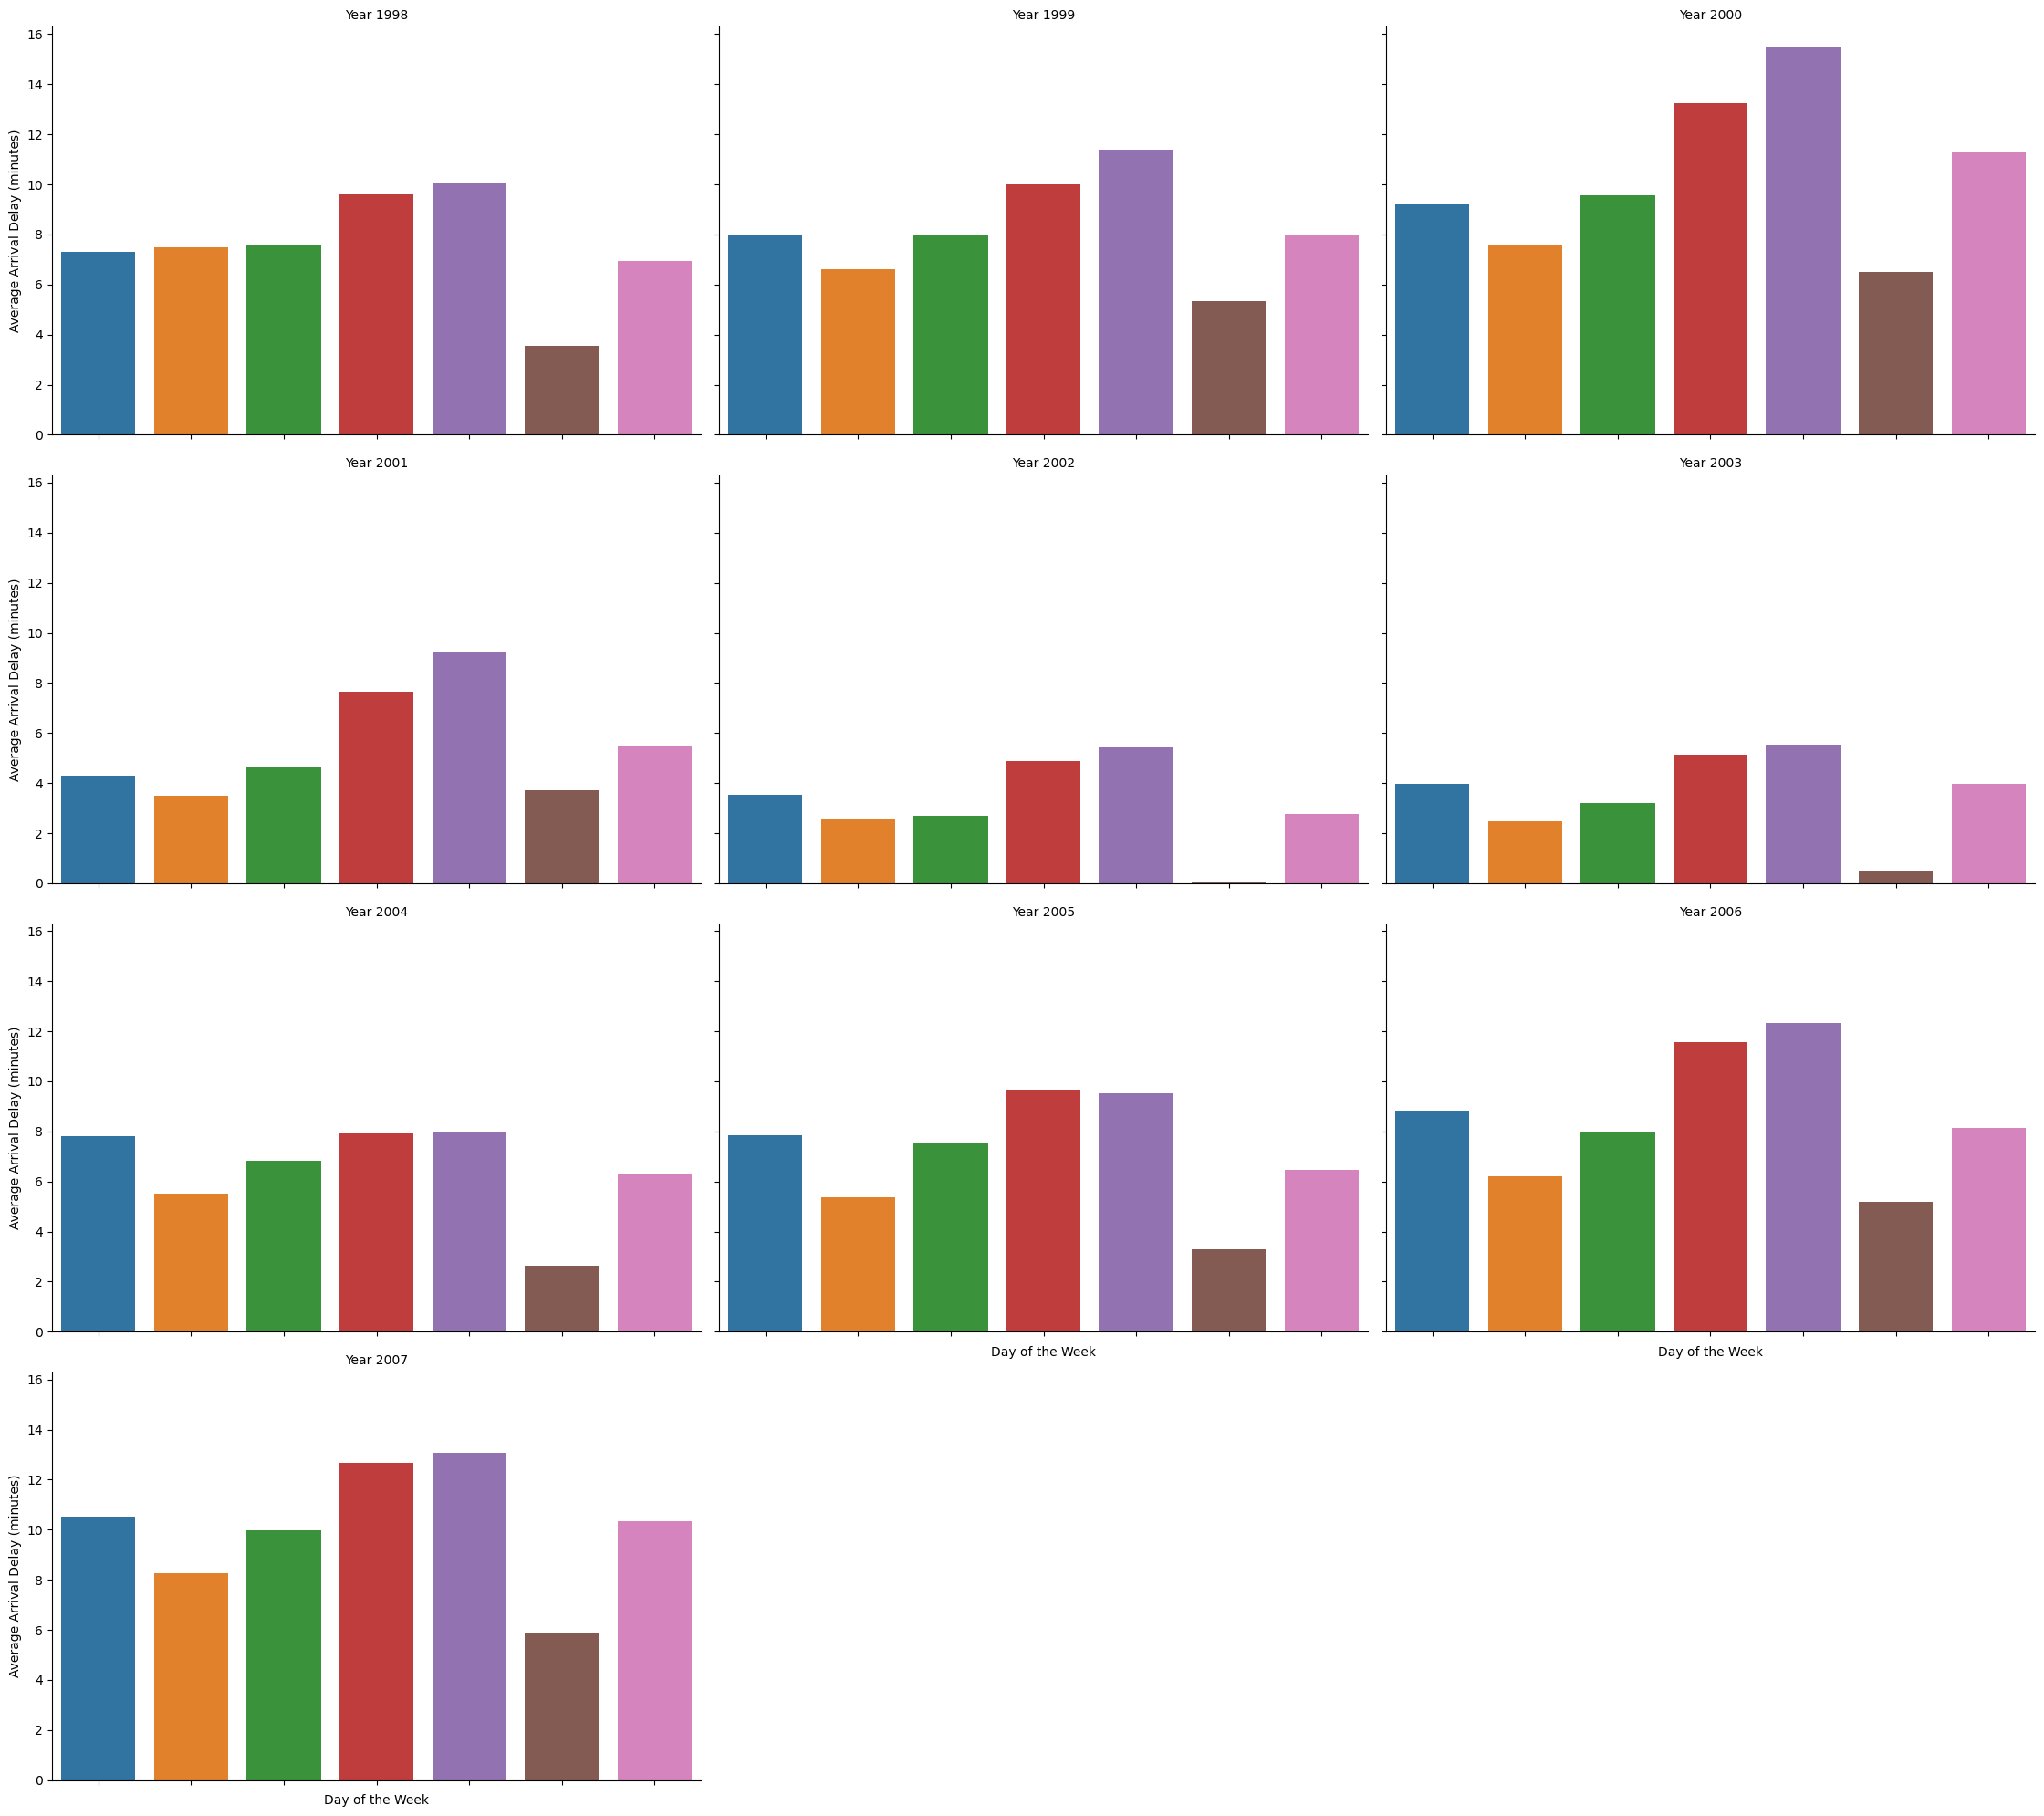

In [65]:
plt.figure(figsize=(15, 10))
g = sns.catplot(x='DayOfWeek', y='AvgArrDelay', col='Year', col_wrap=3, data=day_of_week_avg_delays, kind='bar', height=5, aspect=1.5)
g.set_axis_labels('Day of the Week', 'Average Arrival Delay (minutes)')
g.set_titles('Year {col_name}')
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

#### Grouping & Renaming Columns (Departure)

In [66]:
#Grouping flight_data by Year & DayOfWeek, calculating average departure delay
day_of_week_avg_delays = flight_data.groupby(['Year', 'DayOfWeek']).agg({'DepDelay': 'mean'}).reset_index()

In [67]:
#Renaming 'DepDelay' column to 'AvgDepDelay'
day_of_week_avg_delays.rename(columns={'DepDelay': 'AvgDepDelay'}, inplace=True)

In [68]:
#Creating dictionary to map day of week numbers to names (1= Monday,.....,7=Sunday)
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

In [69]:
#Mapping day of week numbers to names 
day_of_week_avg_delays['DayOfWeek'] = day_of_week_avg_delays['DayOfWeek'].map(day_map)

#### Plotting for Departure Delay

<Figure size 1500x1000 with 0 Axes>

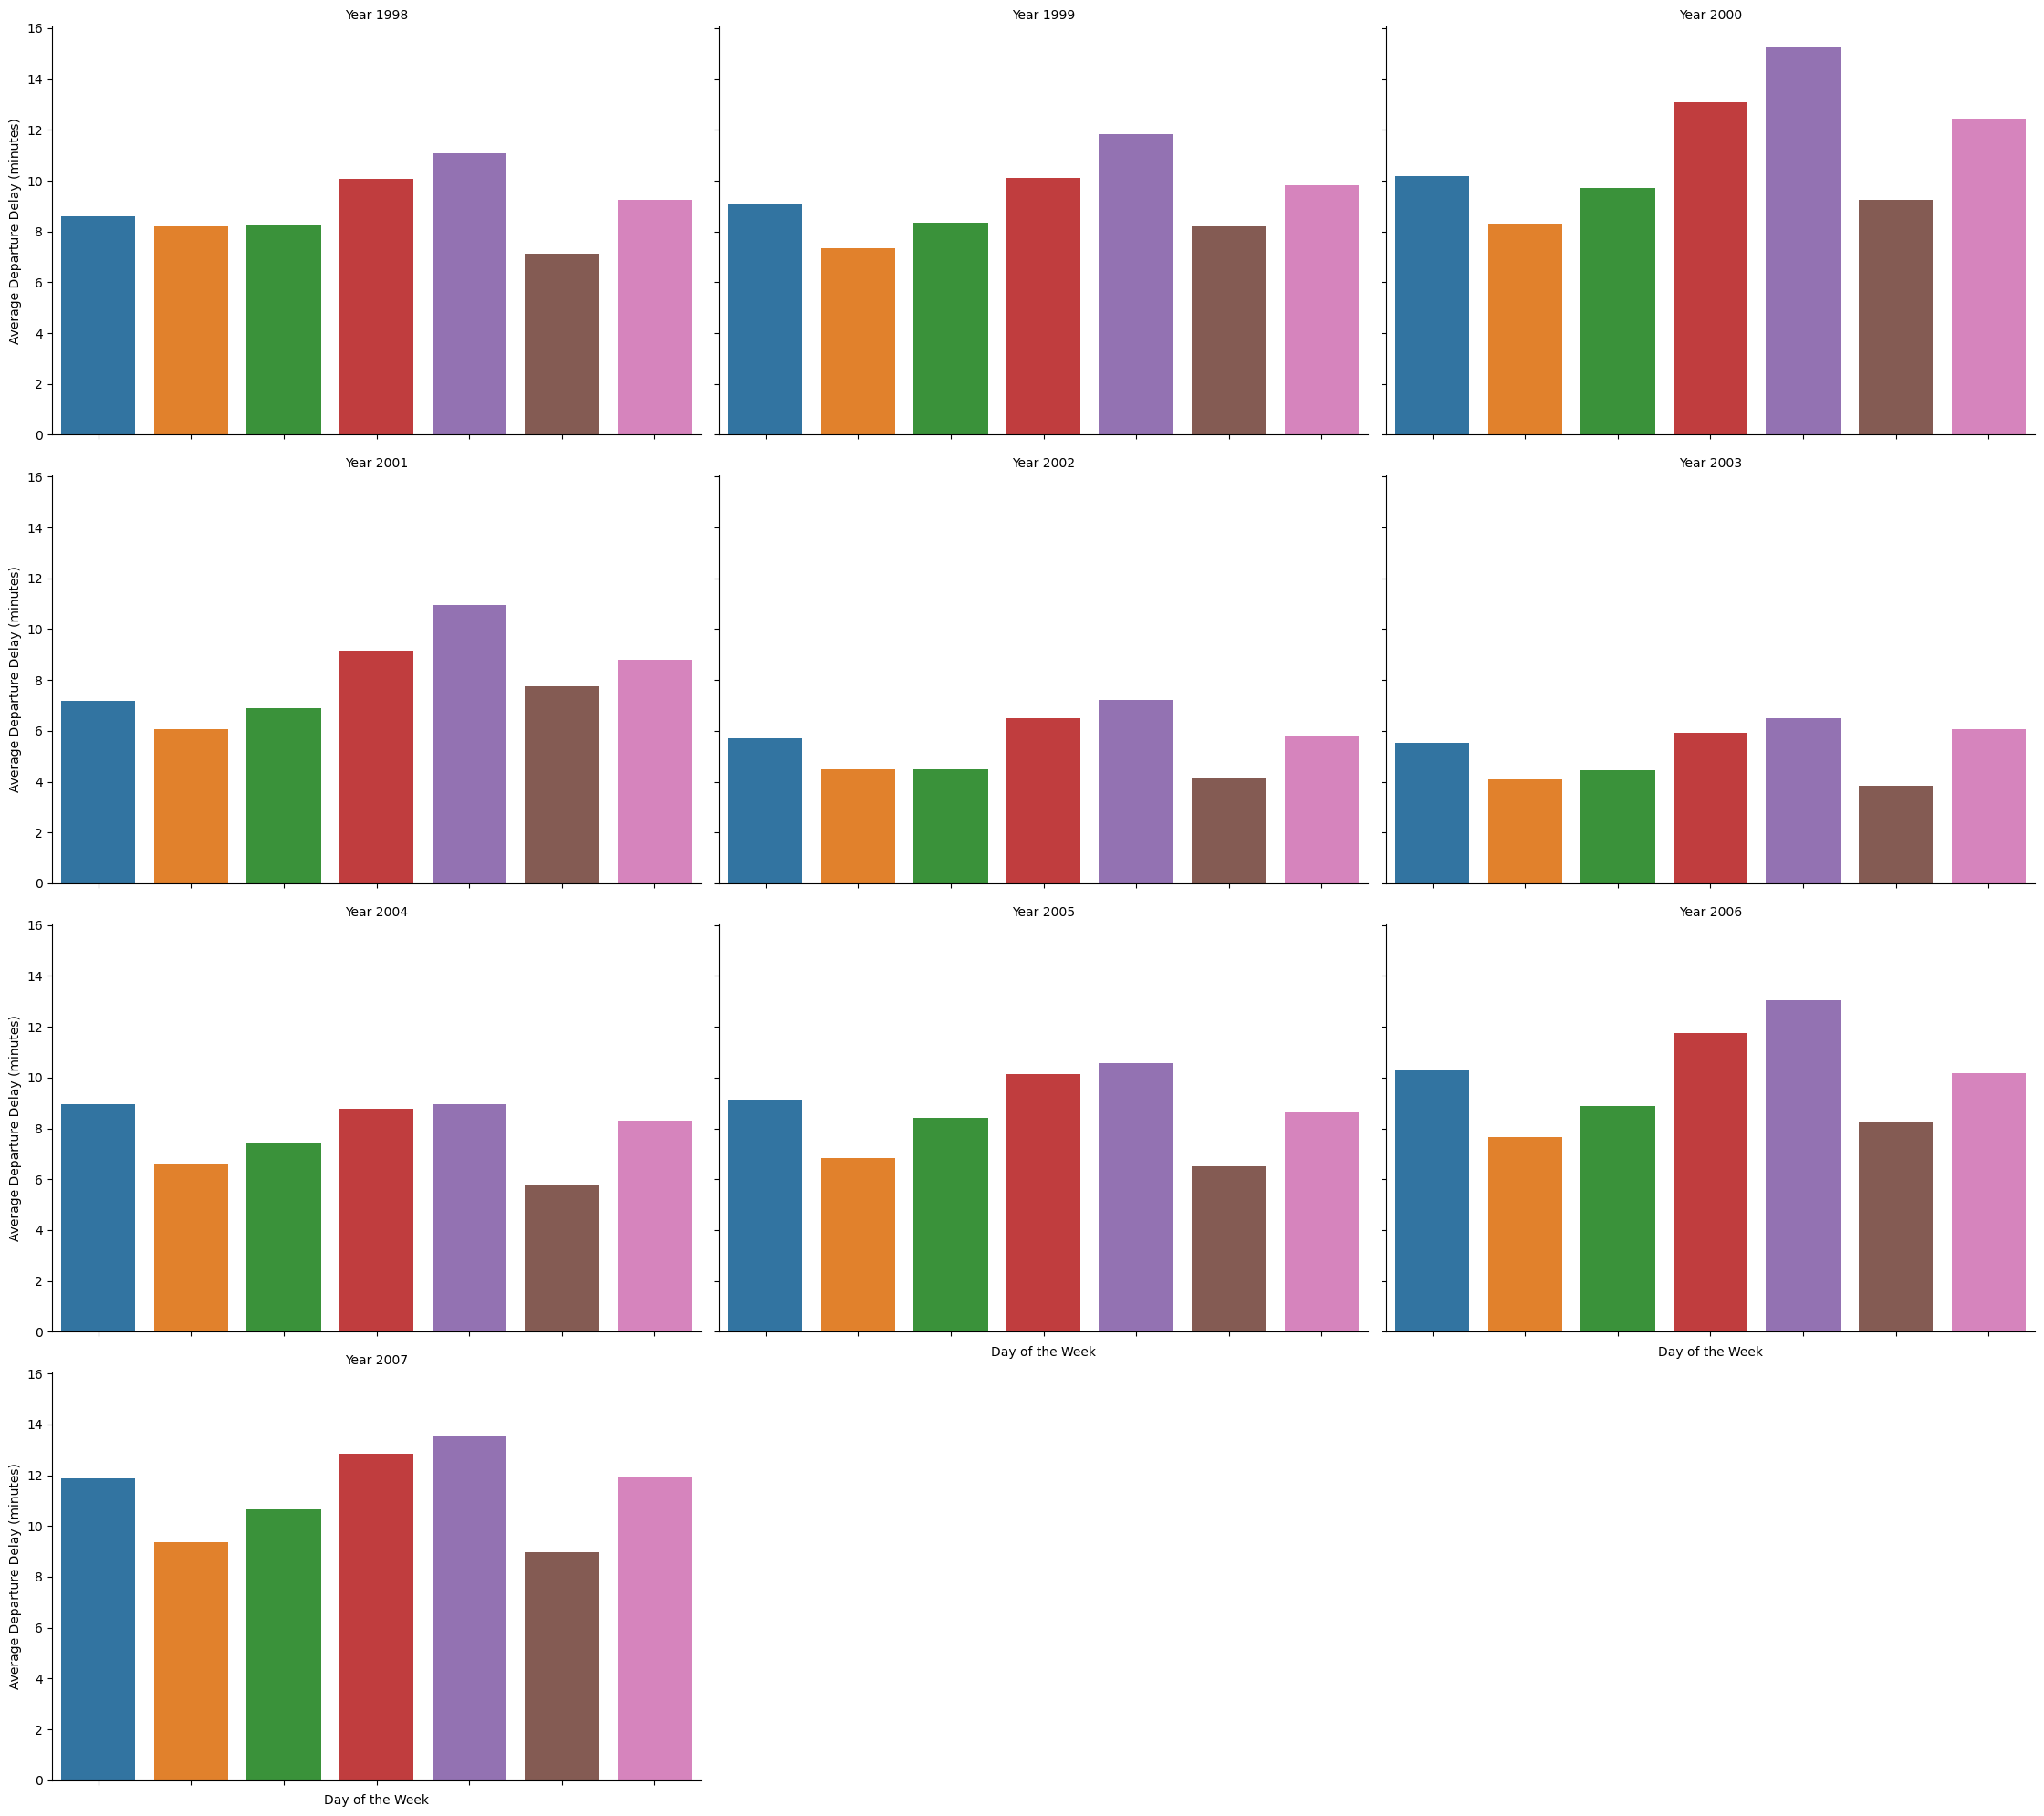

In [70]:
plt.figure(figsize=(15, 10))
g = sns.catplot(x='DayOfWeek', y='AvgDepDelay', col='Year', col_wrap=3, data=day_of_week_avg_delays, kind='bar', height=5, aspect=1.5)
g.set_axis_labels('Day of the Week', 'Average Departure Delay (minutes)')
g.set_titles('Year {col_name}')
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

### Best time of the day to minimise delays done separately for Arrival and Departure delays

### Arrival Delay

In [46]:
flight_data.dtypes

Year           int64
DayOfWeek      int64
ArrDelay     float64
DepDelay     float64
ArrTime       object
DepTime      float64
ArrHour        int64
dtype: object

In [71]:
# Converting 'ArrTime' to integer & formatting it
flight_data['ArrTime'] = flight_data['ArrTime'].astype(str).str.zfill(4)

In [72]:
# Creating a new column 'ArrHour' to store the hour part of 'ArrTime'
flight_data['ArrHour'] = flight_data['ArrTime'].str.slice(0, 2).astype(int)

In [73]:
# Grouping 'ArrHour' into 3 groups (0001-0800, 0801-1600, 1601-2400) & Labelling groups
flight_data['ArrTimeGroup'] = pd.cut(flight_data['ArrHour'], bins=[0, 8, 16, 24],
                                     labels=['First Third', 'Second Third', 'Last Third'])

In [74]:
# Dropping 'ArrTime', 'ArrHour' columns
flight_data.drop(['ArrTime', 'ArrHour'], axis=1, inplace=True)

# Dropping rows with missing values
flight_data.dropna(inplace=True)

#### Grouping Data & Calculating Average Delay 

In [75]:
avg_delay_per_group = flight_data.groupby(['Year', 'ArrTimeGroup']).agg({'ArrDelay': 'mean'}).reset_index()

#### Plotting for Time Groups vs Arrival delay 

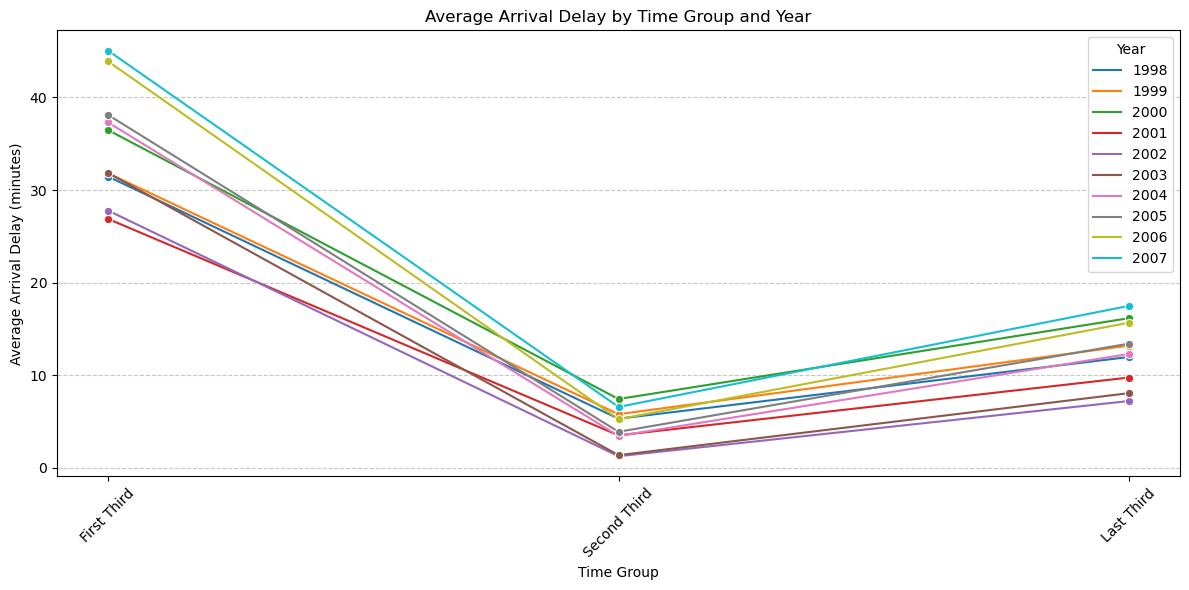

In [76]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='ArrTimeGroup', y='ArrDelay', hue='Year', data=avg_delay_per_group, marker='o', palette='tab10')
plt.xlabel('Time Group')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Time Group and Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Departure Delay

In [77]:
#Converting 'DepTime' to integer & formatting it
flight_data['DepTime'] = flight_data['DepTime'].astype(str).str.zfill(4)

In [78]:
#Creating new column 'DepHour' to store hour part of 'DepTime'
flight_data['DepHour'] = flight_data['DepTime'].str.slice(0, 2).astype(int)

In [79]:
#Grouping 'DepHour' into 3 groups (0001-0800, 0801-1600, 1601-2400) and renaming the groups
flight_data['DepTimeGroup'] = pd.cut(flight_data['DepHour'], bins=[0, 8, 16, 24],
                                     labels=['First Third', 'Second Third', 'Last Third'])

In [80]:
#Dropping 'DepTime', 'DepHour' columns
flight_data.drop(['DepTime', 'DepHour'], axis=1, inplace=True)
# Dropping rows with missing values
flight_data.dropna(inplace=True)

#### Grouping & Calculating Average Delays

In [81]:
avg_delay_per_group = flight_data.groupby(['Year', 'DepTimeGroup']).agg({'DepDelay': 'mean'}).reset_index()

#### Plotting for Time Group vs Departure Delay

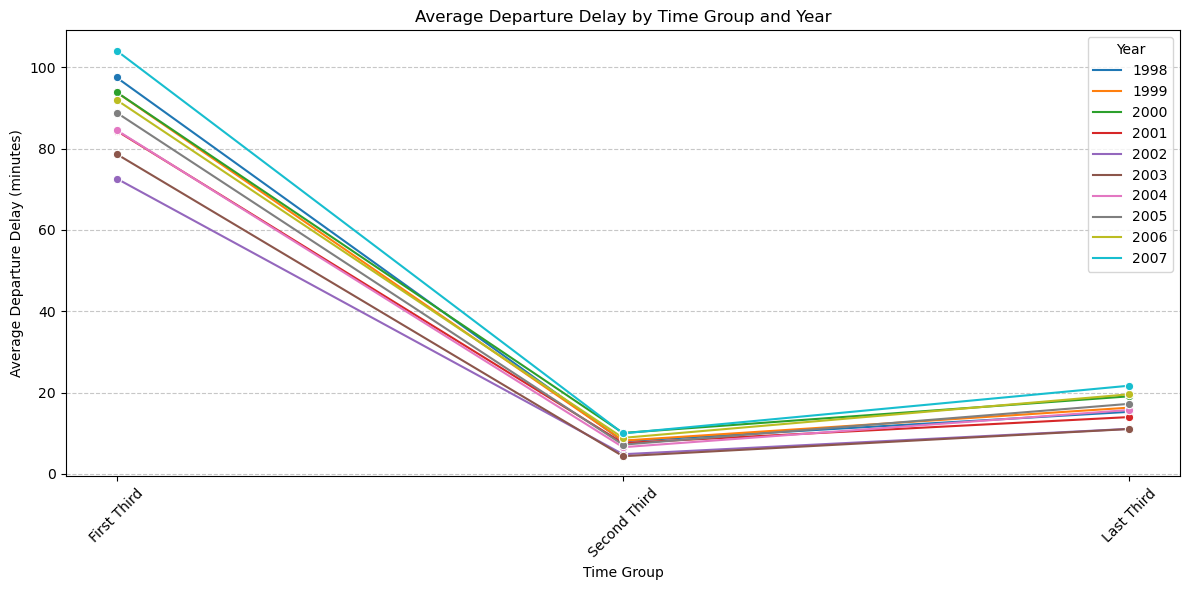

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DepTimeGroup', y='DepDelay', hue='Year', data=avg_delay_per_group, marker='o', palette='tab10')
plt.xlabel('Time Group')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Time Group and Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()